1.
__________________
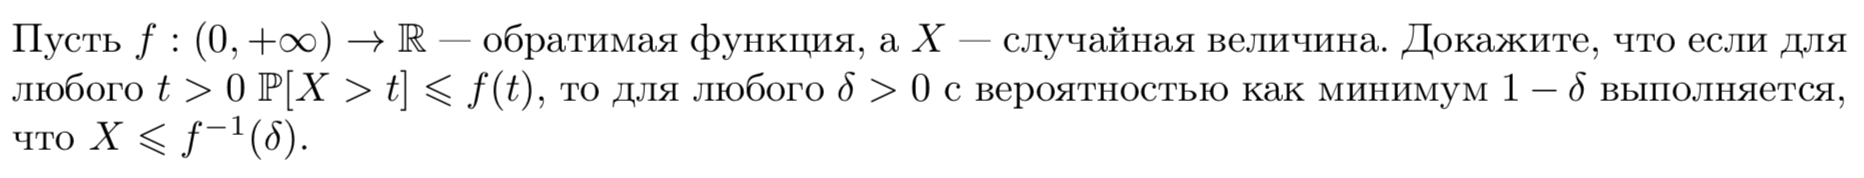

    Требуется доказать справедливость следующего выражения
$$
\mathbb{P} [ X \leq f^{-1} (\delta) ] \geq 1 - \delta
$$

    Отнимем от обоих частей единицу и домножим на -1
$$
\mathbb{P} [ X > f^{-1} (\delta) ] \leq \delta
$$

    Сделаем замену переменных $ t_\delta = f^{-1} (\delta) > 0 $. Подставив в исходное выражение получим ( $ f : (0; +\infty) \rightarrow (0; +\infty) $ – следует из определения вероятности ($P \geq 0$) и условий задания)
$$
\mathbb{P} [ X > t_\delta ] \leq f(f^{-1} (t_\delta)) = t_\delta
$$
что выполняется по условию.

2.
________________________________

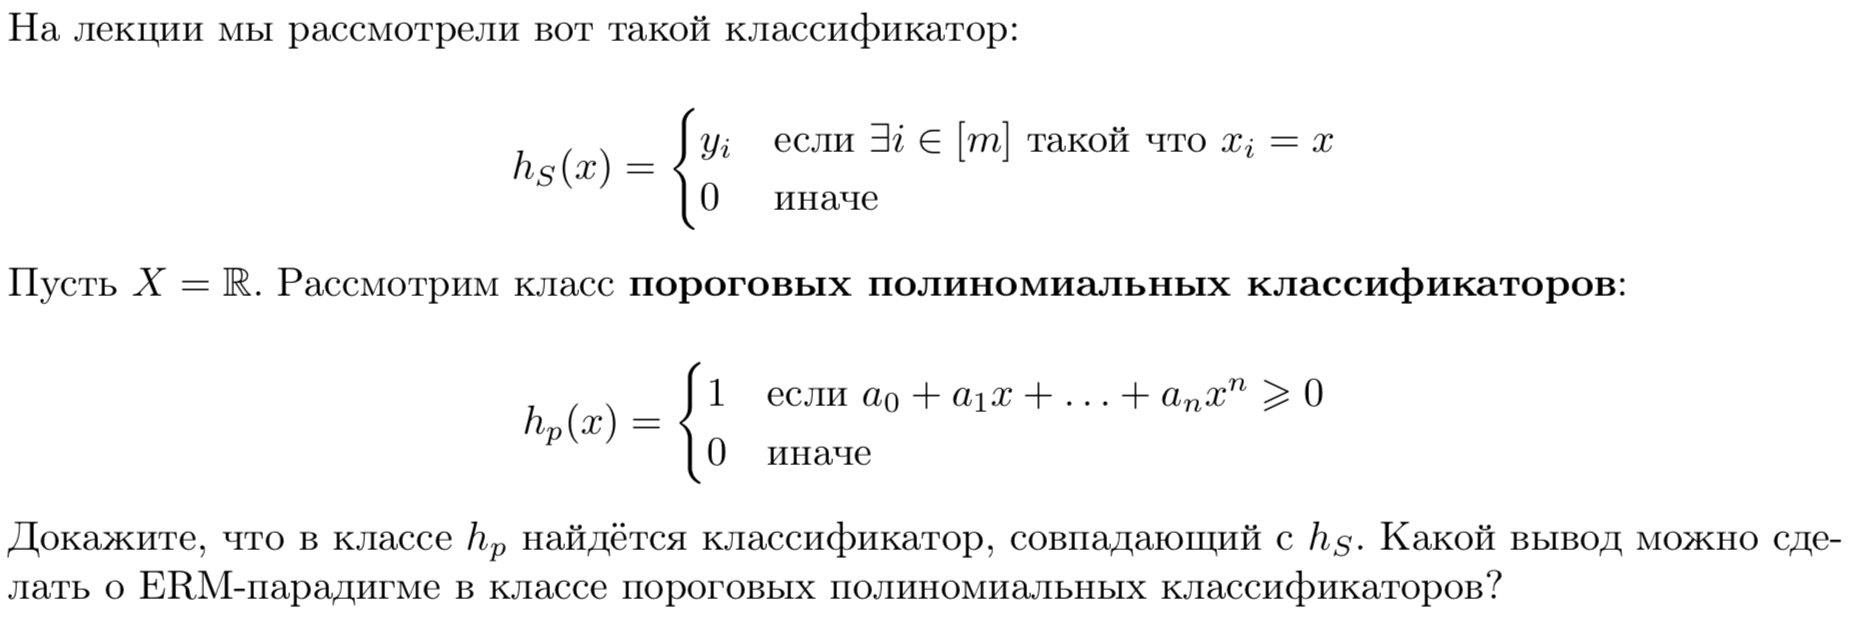

Для начала предположим, как может выглядеть полином, который будет эквивалентен $h_s (x)$ (то есть, принимающий значения, более или равные нулю в конечном числе точек.

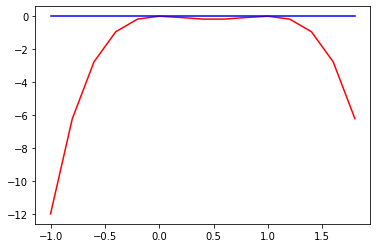

In [26]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-1., 2., 0.2)
c = 3

def f(x):
    return -c*x**4 + 2*c*x**3 - c*x**2

plt.plot(t, f(t), 'r', t, 0*t, 'b')
plt.show()

    Теперь попробуем вывести общий вид такого уравнения исходя из корней в нуле, производной равной нулю в корнях и общей неположительности функции(для простоты возьмем два корня x = 0 и x = 1)

In [32]:
# Технический блок, можно пропускать при чтении отчета
from sympy.core.symbol import symbols
from sympy import *
from sympy.solvers.solveset import nonlinsolve

def f(a, b, c, d, e, x):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e


def df(a, b, c, d, x):
    return 4* a * x**3 + 3 * b * x**2 + 2 * c * x + d


a, b, c, d, e = symbols('a, b, c, d, e', real=True)
x1, x2 = 0, 1
print(nonlinsolve(
    [
        f(a, b, c, d, e, x1), 
        f(a, b, c, d, e, x2),
        df(a, b, c, d, x1),
        df(a, b, c, d, x2),
        f(a, b, c, d, e, x) <= 0,
    ],
    [a, b, c, d, e]))

{(c, -2*c, c, 0, 0)}


Однако, разложив это решение на множетили заметим обратим внимание на его структуру. Обобщив ее, получим следующий вид
$$ \sum_{a_k \in \left\{ x_i \colon y_i=1 \right\}} (x-a_k)^2 \leq 0$$
То есть мы построили общий вид полинома, который для любой S позволяет построить классификатор, эквивалентный $h_s (x)$, что и требовалось доказать.

Вывод: ERM-парадигма в классе пороговых полиномиальных классификаторов может приводить к переобучению. Однако, в отличае от $h_s (x)$, который гарантированно переобучается, данный классификатор вполне может оказаться работоспособным, так как полином имеет свойство локального знакопостоянства в общем случае, хоть нами и был приведен противоположный пример.  
P.S. Полином большой степени скорее всего будет иметь проблемы с машинной точностью при малых по модулю аргументах

3. 
____
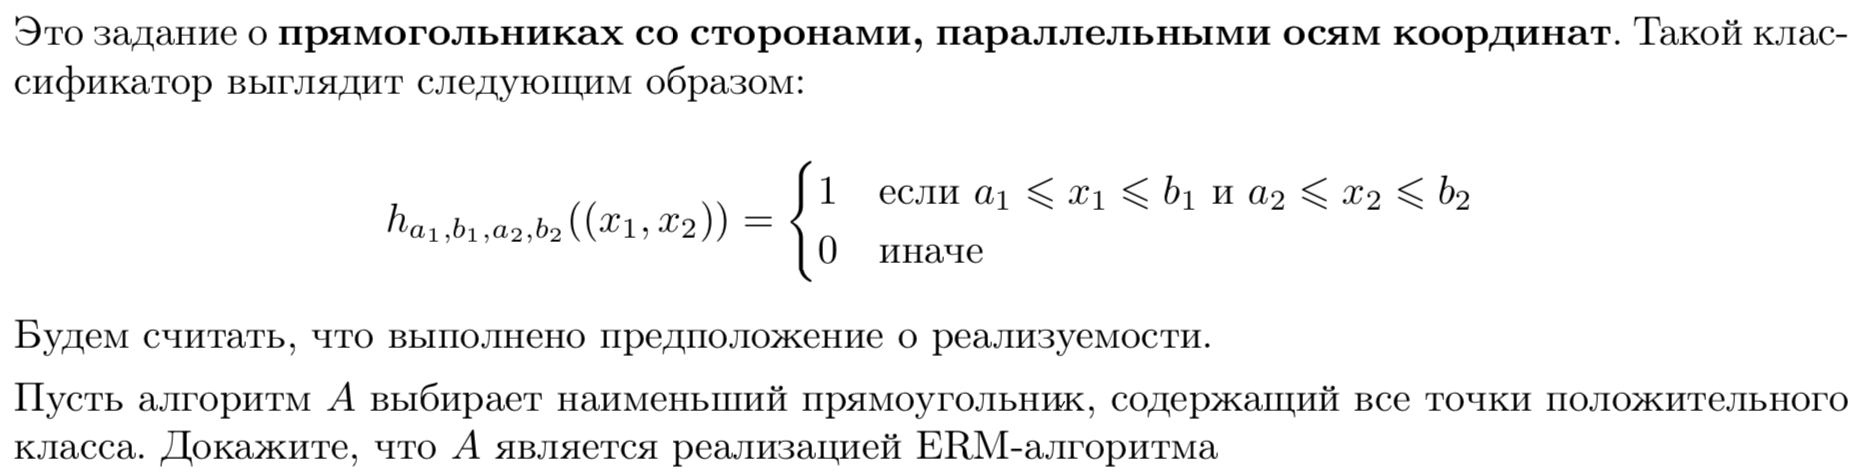



Предположение о реализуемости гласит:
$$
Найдётся\; такая\; гипотеза\; h^∗ \in H ,что\; L_{D,f}(h^∗) = 0
$$
Значит, если существует такая точка $(x_1, x_2)$, что $a_1 \leq x_1 \leq b_1$, $a_2 \leq x_2 \leq b_2$ и $y = 0$, то $ L(h) > 0$, что противоречит предположению о реализуемости.  
То есть, исходя из условия, можно выбрать такой прямоугольник, что все положительно определенные точки окажутся внутри него, а отрицательно - снаружи. А значит, выбирая минимальный такой прямоугольник - проходящий через крайние точки области, ограничивающей все положительно определенные точки обучающей выборки, мы захватим в него их и только их, то есть эмпирический риск окажется равным нулю, что и требовалось доказать.

$$
L_S(h) = \frac{\left|\left\{i \in [m] : h(x_i) \neq y_i\right\}\right|}m 
$$


4-5.
___
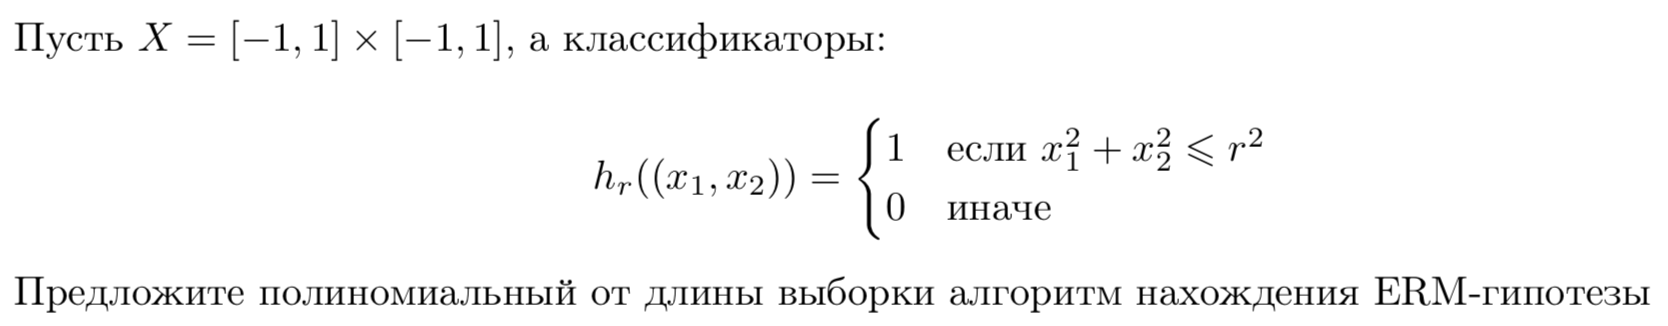

Алгоритм следующий:  
    1. Отсортируем все токи по расстоянию от центра круга
    2. Пройдемся по всем точкам от центра к краю считая при этом имперический риск классификатора  
    при условии проведения окружности через текущую точку
    3. Найдем минимум среди всех высчитанных рисков - через точку его достижения и проведем окружность  
    Так же дополнительно введем пустой круг с радиусом, меньшим расстояния до ближайшей точки  
    Трудоемкость полученного алгоритма - О(mlog(m)), где m - размер обучающей выборки

Lowes ER is 0.42
r = 1.9049178264195528
Figure(432x288)


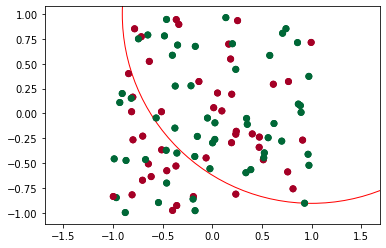

In [252]:
M = 100
c1, c2 = 1, 1 # circle center - BONUS

S = np.random.rand(M,3)*2-1
S[:,2] = (np.random.rand(M,1) > 0.5)[:,0]


def circle_classifier(r, x1, x2):
    return (x1 - c1)**2 + (x2 - c2)**2 <= r**2


def print_all(S, r):
    fig, ax = plt.subplots()
    ax.add_artist(plt.Circle((c1, c2), r, color='r', fill=False))
    ax.add_artist(plt.scatter(S[:,0], S[:,1], c=S[:,2], cmap=plt.cm.RdYlGn))
    ax.axis('equal')
    print(fig)
    
    
def dist(p):
    return np.sqrt((p[0] - c1)**2 + (p[1] - c2)**2)
    
    
def sort_points_by_dist(np_list): # O(m*log(m))
    l = list(np_list)
    l.sort(key=lambda p: dist(p))
    return np.array(l)
    
    
def train(S): # O(m) + O(m*log(m))
    s = sort_points_by_dist(S)
    positive_count = np.count_nonzero(s[:,2])
    s_len = len(s)
    rate = np.zeros(len(s) + 1)
    rate[0] = positive_count / s_len
    positive_counsts = [0 for i in s]
    for i, p in enumerate(s):
        positive_additional = 0
        if p[2] == 1:
            positive_additional = 1
        if i == 0:
            positive_counsts[i] = positive_additional
        else:
            positive_counsts[i] = positive_counsts[i-1] + positive_additional
        rate[i+1] = (i + 1 - 2*positive_counsts[i] + positive_count) / s_len
    k = np.argmin(rate)
    print('Lowes ER is', np.min(rate))
    if k == 0:
        return dist(s[0][:-1]) / 2
    return dist(s[k-1][:-1])
    

r = train(S)
print('r =', r)
print_all(S, r)